In [1220]:
import csv
import locale
import time
from datetime import datetime

locale.setlocale(locale.LC_ALL, '')
timeFactor = lambda x: round(-0.2369935 + (0.981336 + 0.2369935)/(1 + pow((x/2.542431), 3.1187)), 3)

def yearsFromDate(dateString):
    if len(dateString) == 0:
        return 1
    date = datetime.strptime(dateString, "%m/%d/%Y")
    diff = datetime.utcnow() - date 
    return round(diff.days / 365, 2)

def getNumEmployees(employeesString):
    if '+' in employeesString:
        return employeesString[:employeesString.index('+')]
    return employeesString[employeesString.index('-') + 1:] if '-' in employeesString else "10000"

with open ('new_top_companies.csv', 'r') as file:
    reader = csv.DictReader(file)
    companies = [row for row in reader]
for company in companies:
    status = company['last_funding_type'] if company['status'] != 'IPO' else company['status']
    time_weight = timeFactor(yearsFromDate(company['last_funding_date'])) if status != 'IPO' else 1
    total_funding = round(locale.atof(company['total_equity_funding_amount'][1:])/1000000, 2) if len(company['total_equity_funding_amount']) > 1 else 0
    num_employees = int(getNumEmployees(company['employees_estimate']))
    score = round(total_funding * time_weight / num_employees, 3)
    company['score'] = str(score)
    
for company in companies[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

SpaceX | $1,495,560,000 | 1001-5000 | 0.292
BuzzFeed | $496,300,000 | 501-1000 | 0.447
Uber | $8,812,450,000 | 5001-10000 | 0.848
HubSpot | $100,500,000 | 501-1000 | 0.101
DJI | $105,000,000 |  | 0.004
Symantec | $503,000,000 | 10001+ | 0.05
Redfin | $167,820,000 | 501-1000 | 0.168
GrubHub | $84,100,000 | 501-1000 | 0.084
Flipkart | $7,122,140,000 | 10001+ | 0.696
Yelp | $56,000,000 | 501-1000 | 0.056
WeWork | $9,853,784,331 | 501-1000 | 9.647
Databricks | $247,000,000 | 101-250 | 0.967
ThoughtSpot | $150,700,000 | 101-250 | 0.59
Hyperloop One | $141,100,000 | 101-250 | 0.495
Groupon | $1,387,000,000 | 1001-5000 | 0.277
Impossible Foods | $257,000,000 | 101-250 | 1.005
Lyft | $2,612,500,000 | 1001-5000 | 0.502
Outbrain | $194,000,000 | 501-1000 | 0.144
TuneIn | $103,122,231 | 51-100 | 1.01
Zillow | $96,627,980 | 1001-5000 | 0.019


In [1221]:
companies.sort(key=lambda x: float(x['score']), reverse=True)
for company in companies[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

Ele.me | $3,335,000,000 | 11-50 | 64.766
Filecoin | $252,120,000 | 1-10 | 24.657
Wish | $1,078,700,000 | 11-50 | 19.222
Jiuxian.com | $249,963,505 | 1-10 | 10.673
Expa | $150,000,000 | 1-10 | 10.485
WeWork | $9,853,784,331 | 501-1000 | 9.647
Ionic Security | $122,440,001 | 1-10 | 9.342
Genalyte | $91,800,000 | 1-10 | 8.262
Calient Technologies | $405,118,814 | 11-50 | 6.749
ARMO BioSciences | $100,000,000 | 1-10 | 6.44
Dailyhunt | $66,643,163 | 1-10 | 5.844
Guardant Health | $550,000,000 | 51-100 | 5.319
GRAIL | $1,311,655,039 | 101-250 | 5.147
Forty Seven | $75,000,000 | 1-10 | 4.98
Mobvoi Inc. | $252,720,178 | 11-50 | 4.847
Kabbage | $488,650,000 | 51-100 | 4.779
Editas Medicine | $210,000,000 | 11-50 | 4.2
Desktop Metal | $211,760,835 | 11-50 | 4.138
AirMap | $43,600,000 | 1-10 | 4.12
Katerra | $205,573,028 | 11-50 | 3.951


In [1222]:
sf_startups = [company for company in companies if 'San Francisco, California, United States' in company['headquarters_location']]
for company in sf_startups[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

Wish | $1,078,700,000 | 11-50 | 19.222
Expa | $150,000,000 | 1-10 | 10.485
Pinterest | $1,466,100,000 | 251-500 | 2.847
Digit | $36,300,000 | 1-10 | 2.77
Instabase | $26,970,000 | 1-10 | 2.624
Instacart | $674,800,000 | 101-250 | 2.564
Affirm | $620,000,000 | 101-250 | 2.433
Vicarious | $122,000,000 | 11-50 | 2.384
Invuity | $106,999,999 | 11-50 | 2.14
Airware | $109,550,000 | 11-50 | 2.055
Amitree | $19,828,000 | 1-10 | 1.941
Mavrx | $22,420,781 | 1-10 | 1.93
SoFi | $1,878,226,991 | 501-1000 | 1.779
Autonomic Technologies | $136,200,000 | 11-50 | 1.629
Five Prime Therapeutics | $155,040,487 | 51-100 | 1.55
Discord | $79,300,000 | 11-50 | 1.542
Deem | $526,825,373 | 101-250 | 1.524
Freenome | $77,550,000 | 11-50 | 1.518
Netlify | $14,100,000 | 1-10 | 1.379
Houseparty | $73,200,000 | 11-50 | 1.334


In [1223]:
fintech_startups = [company for company in companies if 'FinTech' in company['categories']]
for company in fintech_startups[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

Kabbage | $488,650,000 | 51-100 | 4.779
Cadre | $133,300,000 | 11-50 | 2.589
Affirm | $620,000,000 | 101-250 | 2.433
PPDai | $70,200,000 | 1-10 | 2.162
BlueVine | $113,000,000 | 11-50 | 2.142
SoFi | $1,878,226,991 | 501-1000 | 1.779
Samlino.dk | $20,463,040 | 1-10 | 1.729
Robinhood | $176,000,000 | 51-100 | 1.695
Blockstream | $126,000,000 | 11-50 | 1.61
Blockchain | $70,000,000 | 11-50 | 1.364
Hyper Anna | $13,644,766 | 1-10 | 1.335
Behalf | $156,000,000 | 51-100 | 1.318
Circle | $136,000,000 | 51-100 | 1.066
Trumid Financial | $54,250,000 | 11-50 | 1.059
PLASTIQ | $45,349,996 | 11-50 | 0.887
Quantopian | $48,800,000 | 11-50 | 0.876
Capital Float | $88,530,456 | 51-100 | 0.867
Coinbase | $217,209,590 | 101-250 | 0.85
Veem | $44,250,000 | 11-50 | 0.841
Upstart | $85,650,000 | 51-100 | 0.812


In [1224]:
non_biotech_companies = [company for company in companies if 'Biotechnology' not in company['categories']]
for company in non_biotech_companies[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

Ele.me | $3,335,000,000 | 11-50 | 64.766
Filecoin | $252,120,000 | 1-10 | 24.657
Wish | $1,078,700,000 | 11-50 | 19.222
Jiuxian.com | $249,963,505 | 1-10 | 10.673
Expa | $150,000,000 | 1-10 | 10.485
WeWork | $9,853,784,331 | 501-1000 | 9.647
Ionic Security | $122,440,001 | 1-10 | 9.342
Calient Technologies | $405,118,814 | 11-50 | 6.749
Dailyhunt | $66,643,163 | 1-10 | 5.844
GRAIL | $1,311,655,039 | 101-250 | 5.147
Mobvoi Inc. | $252,720,178 | 11-50 | 4.847
Kabbage | $488,650,000 | 51-100 | 4.779
Desktop Metal | $211,760,835 | 11-50 | 4.138
AirMap | $43,600,000 | 1-10 | 4.12
Katerra | $205,573,028 | 11-50 | 3.951
Nauto, Inc. | $173,850,000 | 11-50 | 3.397
Go-Jek | $1,750,000,000 | 251-500 | 3.377
cheddar | $32,000,000 | 1-10 | 3.098
Pinterest | $1,466,100,000 | 251-500 | 2.847
Digit | $36,300,000 | 1-10 | 2.77


In [1225]:
mobile_startups = [company for company in companies if 'Mobile' in company['category_groups'] and 'United States' in company['headquarters_location']]
for company in mobile_startups[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

Wish | $1,078,700,000 | 11-50 | 19.222
Expa | $150,000,000 | 1-10 | 10.485
Nauto, Inc. | $173,850,000 | 11-50 | 3.397
Joya Communications | $25,000,000 | 1-10 | 2.25
ooma | $95,432,819 | 11-50 | 1.909
Skydio | $28,000,000 | 1-10 | 1.7
Robinhood | $176,000,000 | 51-100 | 1.695
Discord | $79,300,000 | 11-50 | 1.542
Houseparty | $73,200,000 | 11-50 | 1.334
Onshape | $169,000,000 | 51-100 | 1.208
Branch | $113,050,000 | 51-100 | 1.085
AISense Inc. | $11,200,000 | 1-10 | 1.081
TuneIn | $103,122,231 | 51-100 | 1.01
Getaround | $101,299,999 | 51-100 | 0.976
Zugata | $10,200,000 | 1-10 | 0.916
Zeel | $13,200,000 | 1-10 | 0.913
Amino | $45,000,000 | 11-50 | 0.862
Uber | $8,812,450,000 | 5001-10000 | 0.848
Puls | $43,000,000 | 11-50 | 0.842
Tala (formerly InVenture) | $44,439,706 | 11-50 | 0.84


In [1226]:
data_startups = [company for company in companies if 'Data and Analytics' in company['category_groups']]
for company in data_startups[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

Wish | $1,078,700,000 | 11-50 | 19.222
Mobvoi Inc. | $252,720,178 | 11-50 | 4.847
AirMap | $43,600,000 | 1-10 | 4.12
Instabase | $26,970,000 | 1-10 | 2.624
Vicarious | $122,000,000 | 11-50 | 2.384
Mavrx | $22,420,781 | 1-10 | 1.93
Farmers Business Network | $83,900,000 | 11-50 | 1.594
Orbital Insight, Inc. | $78,700,000 | 11-50 | 1.519
Color Genomics | $150,548,112 | 51-100 | 1.474
Hyper Anna | $13,644,766 | 1-10 | 1.335
Anki | $157,500,000 | 51-100 | 1.241
Lemonade | $60,000,000 | 11-50 | 1.156
Versive | $57,000,000 | 11-50 | 1.116
Branch | $113,050,000 | 51-100 | 1.085
Cockroach Labs | $53,500,000 | 11-50 | 1.035
Databricks | $247,000,000 | 101-250 | 0.967
Solarflare Communications | $251,971,379 | 101-250 | 0.914
Elastifile | $58,000,000 | 11-50 | 0.901
Sumo Logic | $230,000,000 | 101-250 | 0.896
Bitly | $91,500,000 | 51-100 | 0.893


In [1227]:
nyc_startups = [company for company in companies if 'New York' in company['headquarters_location']]
for company in nyc_startups[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

WeWork | $9,853,784,331 | 501-1000 | 9.647
cheddar | $32,000,000 | 1-10 | 3.098
Cadre | $133,300,000 | 11-50 | 2.589
Casper | $239,700,000 | 51-100 | 2.332
Spring Inc | $97,500,000 | 11-50 | 1.886
Common | $23,350,000 | 1-10 | 1.814
Peloton | $444,707,000 | 101-250 | 1.724
Blink Health | $165,000,000 | 51-100 | 1.584
letgo | $375,000,000 | 101-250 | 1.397
Giphy | $150,949,998 | 51-100 | 1.342
Behalf | $156,000,000 | 51-100 | 1.318
Lemonade | $60,000,000 | 11-50 | 1.156
Beeswax | $13,300,000 | 1-10 | 1.134
MakeSpace | $57,600,000 | 11-50 | 1.109
Convene | $113,500,000 | 51-100 | 1.095
Trumid Financial | $54,250,000 | 11-50 | 1.059
Cockroach Labs | $53,500,000 | 11-50 | 1.035
Ellevest | $51,458,913 | 11-50 | 1.008
The Farmer's Dog | $10,100,000 | 1-10 | 0.978
Oscar | $727,500,000 | 251-500 | 0.96


In [1228]:
import pandas as pd

data = pd.read_csv('company_talent.csv', index_col = False)
data.columns = ['company_name', 'num_employees', 'past_companies', 'past_schools']

In [1229]:
data.dropna(how='any')
data.drop_duplicates(subset=['company_name']).head(10)

,company_name,num_employees,past_companies,past_schools
0,Affirm,281,"Google, Affirm, Inc., LinkedIn, Stanford Unive...","Stanford University, University of California,..."
1,Flexport,446,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California, Berkeley, Stanford U..."
2,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California,..."
4,Lemonade,50,"Liberty Mutual Insurance, AIG, Fiverr, Powerma...","Tel Aviv University, IDC Herzliya, Technion - ..."
5,Ripple,208,"Ripple, HSBC, Morgan Stanley, Citi, Accenture","University of California, Berkeley, Stanford U..."
6,Cadre,88,"Morgan Stanley, Goldman Sachs, Google, Square,...","University of Pennsylvania, Harvard University..."
7,Zocdoc,588,"Zocdoc, Apple, Microsoft, Yodle, Arizona State...","Arizona State University, Cornell University, ..."
8,Sourcegraph,21,"Google, Stanford University, LinkedIn, Bain & ...","Stanford University, Emerson College, Vanderbi..."
9,SpaceX,4602,"SpaceX, Boeing, US Navy, United States Air For...","University of Southern California, Embry-Riddl..."


In [1230]:
data.shape

(1766, 4)

In [1231]:
past_schools_column = []
school_prefixes = ['University of California', 'California State University', 'Indian Institute of Technology']
for index, school_string in enumerate(data.past_schools):
    if not isinstance(school_string, str):
        data.drop(index, inplace=True)
        continue
    schools = school_string.split(',') 
    for k, v in enumerate(schools):
        v = v.strip()
        if any(school_prefix == v for school_prefix in school_prefixes):
            if k + 1 < len(schools):
                schools[k] += schools[k+1]
                schools[k].strip()
                del(schools[k+1])
        if v == 'Haas School of Business':
            schools[k - 1] += schools[k]
            del(schools[k])
    past_schools_column.append(','.join(schools))
data.past_schools = past_schools_column

In [1232]:
stanford_startups = data[data.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0])]
stanford_startups.tail(5)

,company_name,num_employees,past_companies,past_schools
1732,Shogun Enterprises,18,"Northwestern University, BarLift, Stanford Uni...","Stanford University, Northwestern University, ..."
1753,Strava,189,"Strava, Apple, Google, Nike, Twitter","Stanford University, Harvard University, Unive..."
1760,Anduril,7,"Palantir Technologies, Oculus VR, Mithril Capi...","Stanford University, Cornell University, Unive..."
1761,Sourcegraph,23,"Google, Stanford University, Facebook, LinkedI...","Stanford University, Vanderbilt University, RW..."
1762,Hashicorp,142,"HashiCorp, Hortonworks, Hewlett Packard Enterp...","Stanford University, San Jose State University..."


In [1233]:
stanford_startups = stanford_startups[(stanford_startups.num_employees > 10) & (stanford_startups.num_employees < 300)]
stanford_startups.sort_values('num_employees').tail(10)

,company_name,num_employees,past_companies,past_schools
805,Newsela,206,"Newsela, Teach For America, Stanford Universit...","Stanford University, New York University, Hunt..."
222,Instart Logic,210,"Akamai Technologies, Hewlett Packard Enterpris...","Stanford University, University of California ..."
166,Change.org,217,"Change.org, Zynga, Greenpeace, Cisco, Plan Int...","Stanford University, University of California ..."
424,Honor,218,"Google, Meebo, Apple, Home Instead Senior Care...","Stanford University, Stanford University Gradu..."
21,ThoughtSpot,220,"IBM, ThoughtSpot, Oracle, Google, Stanford Uni...","Stanford University, San Jose State University..."
452,Doctor On Demand,233,"vRad (Virtual Radiologic), Castlight Health, P...","Stanford University, New York University, Univ..."
640,Hearsay Systems,253,"Hearsay Systems, Microsoft, Google, Salesforce...","Stanford University, University of California ..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ..."
138,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ..."
0,Affirm,281,"Google, Affirm, Inc., LinkedIn, Stanford Unive...","Stanford University, University of California ..."


In [1234]:
former_palantir = data[data.past_companies.str.contains('Palantir Technologies', na=False)]
former_palantir

,company_name,num_employees,past_companies,past_schools
2,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ..."
406,MemSQL,120,"Oracle, Microsoft, MemSQL, Palantir Technologi...","Stanford University, Carnegie Mellon Universit..."
670,Handshake,82,"Michigan Technological University, Google, Pal...","Michigan Technological University, Stanford Un..."
924,Alluxio,23,"Microsoft, Google, Palantir Technologies, Broc...","Carnegie Mellon University, Tsinghua Universit..."
1264,Asana,338,"Asana, Google, Facebook, Apple, Palantir Techn...","Stanford University, Cornell University, Unive..."
1452,Palantir Technologies,1992,"Palantir Technologies, Google, Microsoft, Stan...","Stanford University, Cornell University, Massa..."
1648,Socotra,45,"Palantir Technologies, Carnegie Mellon Univers...","University of California Berkeley, Stanford Un..."
1729,Nuna Inc.,124,"Stanford University, Nuna Inc., Google, Blue S...","Stanford University, University of California ..."
1731,Nuna Inc.,124,"Stanford University, Nuna Inc., Google, Blue S...","Stanford University, University of California ..."


In [1235]:
ex_bridgewater = data[data.past_companies.str.contains('Bridgewater', na=False)]
ex_bridgewater

,company_name,num_employees,past_companies,past_schools
138,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ..."
368,Domino Data Lab,72,"Bridgewater Associates, FactSet, Platfora (Acq...","Massachusetts Institute of Technology, Univers..."
877,Hello Alfred,47,"SoulCycle Inc., Bridgewater Associates, McKins...","New York University, Boston University, Harvar..."
912,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ..."
975,HealthSherpa,20,"Carter's | OshKosh B'gosh, HealthSTAR Communic...","California State University-Sacramento, Yale U..."
1007,OpenInvest,14,"Bridgewater Associates, World Wildlife Fund, L...","The Johns Hopkins University, Cornell Universi..."
1488,Hubble Contacts,15,"Starbucks, Panaya, Hubble Contacts, Bridgewate...","Hunter College, Columbia University in the Cit..."
1515,MediaSpike,9,"Wolfram, HMC Electronics, A Division of Hisco,...","Lodz University of Technology, University of I..."
1649,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka..."
1685,Oscar,508,"Oscar Health, Google, Apple, Bridgewater Assoc...","Harvard University, New York University, Arizo..."


In [1236]:
ex_goldman = data[data.past_companies.str.contains('Goldman Sachs', na=False)]
ex_goldman = ex_goldman[ex_goldman.num_employees > 10]
ex_goldman.sort_values('num_employees').head()

,company_name,num_employees,past_companies,past_schools
1679,Chain,27,"Goldman Sachs, Microsoft, Wakefield Council, A...","Carnegie Mellon University, Stanford Universit..."
1373,SevenFifty,30,"SevenFifty, Goldman Sachs, Penguin Random Hous...","University of Pennsylvania, New York Universit..."
193,Ellevest,38,"Goldman Sachs, NYC Department of Parks & Recre...","University of Pennsylvania, Harvard University..."
1124,Artivest,39,"Artivest, Merrill Lynch, UBS, Clarium Capital ...","New York University, University of Virginia, Y..."
1682,Petal,39,"American Express, JPMorgan Chase & Co., Citi, ...","Stanford University, University of California ..."


In [1237]:
ex_clarium = data[data.past_companies.str.contains('Clarium Capital', na=False)]
ex_clarium

,company_name,num_employees,past_companies,past_schools
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ..."
1062,Chatous,6,"Clarium Capital Management, Hanover College, I...","University of Toronto, University of Waterloo,..."
1124,Artivest,39,"Artivest, Merrill Lynch, UBS, Clarium Capital ...","New York University, University of Virginia, Y..."
1608,Kalo,75,"Zenefits, Kalo, Cisco, Deutsche Bank, Clarium ...","University of Warwick, Boston University, Univ..."


In [1238]:
ex_google = data[data.past_companies.str.contains('Google', na=False)]
ex_google.sort_values('num_employees').tail(10)

,company_name,num_employees,past_companies,past_schools
43,Atlassian,2348,"Atlassian, IBM, Microsoft, Google, Macquarie G...","UNSW, University of Sydney, University of Tech..."
238,Etsy,2709,"Etsy, Google, PwC, Yahoo! Inc., Apple","New York University, Fashion Institute of Tech..."
598,Spotify,3587,"Spotify, Ericsson, Microsoft, Google, Yahoo! Inc.","KTH Royal Institute of Technology, Stockholm U..."
29,Twitter,3742,"Twitter, Google, Microsoft, Yahoo! Inc., Apple","University of California Berkeley, Stanford Un..."
67,Airbnb,6213,"Airbnb, Google, Facebook, Microsoft, Apple","University of California Berkeley, Stanford Un..."
25,Lyft,8321,"Lyft, Google, US Army, US Navy, Walmart","University of Phoenix, University of Californi..."
44,Facebook,22258,"Facebook, Microsoft, Google, Yahoo! Inc., Amazon","Stanford University, University of California ..."
11,Uber,33076,"Uber, Microsoft, Google, Apple, Amazon","University of California Berkeley, Stanford Un..."
1702,Uber,37765,"Uber, Google, Microsoft, Amazon, Apple","University of California Berkeley, Stanford Un..."
113,Google,80409,"Google, Microsoft, IBM, Amazon, Apple","Stanford University, University of California ..."


In [1239]:
prime_startups = data[data.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0] and 'Berkeley' in x.split(',')[1])]
prime_startups.sort_values('num_employees').head(10)

,company_name,num_employees,past_companies,past_schools
772,Buoyant,17,"Twitter, Gracenote, SoundCloud, Oracle, Cisco","Stanford University, University of California ..."
904,Halo Neuroscience,26,"McKinsey & Company, Hamilton College, The Bost...","Stanford University, University of California ..."
756,Momentum Machines,28,"Stanford University, Tesla, Momentum Machines ...","Stanford University, University of California ..."
949,Brightwheel,32,"Amazon, LinkedIn, Indiegogo, NerdWallet, Soldsie","Stanford University, University of California ..."
1672,Digit.co,34,"Blurb, Square, PENSCO Trust Company, a subsidi...","Stanford University, University of California ..."
1682,Petal,39,"American Express, JPMorgan Chase & Co., Citi, ...","Stanford University, University of California ..."
1478,Karius,48,"Stanford University, University of California,...","Stanford University, University of California ..."
1346,Vigilent,49,"Vigilent, Marine Corps Recruiting, Lockheed Ma...","Stanford University, University of California ..."
534,Navdy,54,"Cisco, Astro Studios, Navdy, 99designs, Apple","Stanford University, University of California ..."
912,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ..."


In [1240]:
past_schools = []
for school in [company for company in data.past_schools]:
    past_schools.extend([s.strip() for s in school.split(',')])

In [1241]:
len(set(past_schools))

1823

In [1242]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Charts the 25 most common fields and their frequency
def chart_most_common(field):
    company_counter = Counter(field)
    common_companies = [company for company, count in company_counter.most_common(25)]
    common_companies_count = [count for company, count in company_counter.most_common(25)]
    
    indexes = np.arange(len(common_companies))
    width = 1

    plt.bar(indexes, common_companies_count, width)
    plt.xticks(indexes + width * 0.5, common_companies)
    plt.xticks(rotation=90)
    plt.show()

In [1243]:
past_companies_column = []
company_postfixes = ['Inc.']
for index, company_string in data.past_companies.items():
    if not isinstance(company_string, str):
        data.drop(index, inplace=True)
        continue
    companies = company_string.split(',')
    for k, v in enumerate(companies):
        if any(company_postfix == v.strip() for company_postfix in company_postfixes):
            companies[k - 1] += companies[k]
            del(companies[k])
    past_companies_column.append(','.join(companies))
data.past_companies = past_companies_column

In [1244]:
startups = pd.read_csv('new_top_companies.csv', index_col = False)
startups.columns = ["index", "company_name", "company_name_url", "category_groups", "headquarters_location", "description", 
                    "crunchbase_rank", "website", "last_funding_type", "last_funding_amount", "total_funding_amount", 
                    "trend_score", "employees_estimate", "categories", "founded_date", "status", "last_funding_date", 
                    "total_equity_funding_amount", "valuation_at_ipo"]
startups.drop('index', axis=1, inplace=True)
print(startups.shape)
startups.head(1)

(2067, 18)


,company_name,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,last_funding_type,last_funding_amount,total_funding_amount,trend_score,employees_estimate,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo
0,SpaceX,https://www.crunchbase.com/organization/space-...,"Science and Engineering, Transportation","Hawthorne, California, United States","SpaceX designs, manufactures, and launches adv...",6,http://www.spacex.com,Private Equity,"$350,000,000","$1,495,560,000",0.8,1001-5000,"Space Travel, Aerospace, Transportation",06/01/2002,Operating,07/27/2017,"$1,495,560,000",NaN


In [1245]:
startups_names = list(startups['company_name'])
data_names = list(data['company_name'])
diff = [name for name in startups_names if name not in data_names]
print(len(diff))

388


In [1246]:
diff

['Skillz',
 'Guideline Technologies Inc.',
 'Qihoo 360 Technology',
 'Egnyte',
 'Primary Data',
 'Moon Express, Inc.',
 'Fiverr.com',
 'Nauto, Inc.',
 'Filecoin',
 'Ele.me',
 'Lola Travel Company, Inc.',
 'BarkBox',
 'Zuoyebang',
 'Vectra Networks',
 'Proterra',
 'Whisper',
 'Codecademy',
 'Super Evil Mega Corp',
 'Handy',
 'Toutiao',
 'twoXAR, Incorporated',
 'Tenable Network Security, Inc.',
 'Factual',
 'Bira 91',
 '21 Inc',
 'MedGenome Inc.',
 'Bowery Farming Inc',
 'View',
 'Nuna Incorporated',
 'Eaze',
 'Mobvoi Inc.',
 'Trumid Financial',
 'Bustle Digital Group',
 'Tala (formerly InVenture)',
 'Grabr',
 'Raise Marketplace',
 'Miaopai',
 'Euclid Analytics',
 'Boom Technology',
 'Fever',
 'SecurityScorecard Inc.',
 'Lightspeed POS',
 'SimpliSafe Home Security',
 'Upload VR',
 'Lending Club',
 'Modern Meadow',
 'Mic Network',
 'Compass-EOS',
 'Trippy',
 'Noom',
 'Varonis Systems',
 'Portea Medical',
 'Kespry Inc.',
 'Yunmanman',
 'GreenRoad Technologies',
 'Tuniu',
 'Fond, formerly 

In [1247]:
#fuzzy match name between two tables
import difflib 

def closestName(company_name):
    matches = difflib.get_close_matches(company_name, data['company_name'])
    if len(matches) > 0:
        return matches[0]
    return company_name

#startups['company_name'] = startups['company_name'].apply(lambda x: closestName(x))
startups.head()

,company_name,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,last_funding_type,last_funding_amount,total_funding_amount,trend_score,employees_estimate,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo
0,SpaceX,https://www.crunchbase.com/organization/space-...,"Science and Engineering, Transportation","Hawthorne, California, United States","SpaceX designs, manufactures, and launches adv...",6,http://www.spacex.com,Private Equity,"$350,000,000","$1,495,560,000",0.8,1001-5000,"Space Travel, Aerospace, Transportation",06/01/2002,Operating,07/27/2017,"$1,495,560,000",NaN
1,BuzzFeed,https://www.crunchbase.com/organization/buzzfeed,"Media and Entertainment, Internet Services, Vi...","New York, New York, United States","BuzzFeed provides shareable breaking news, ori...",11,http://www.buzzfeed.com,Series G,"$200,000,000","$496,300,000",-0.1,501-1000,"Internet, News, Video, Digital Entertainment, ...",01/01/2006,Operating,11/18/2016,"$496,300,000",NaN
2,Uber,https://www.crunchbase.com/organization/uber,"Apps, Software, Transportation, Mobile","San Francisco, California, United States",Uber is a mobile app connecting passengers wit...,12,http://www.uber.com,Funding Round,NaN,"$11,562,450,000",1.2,5001-10000,"Transportation, Public Transportation, Mobile ...",03/01/2009,Operating,04/19/2017,"$8,812,450,000",NaN
3,HubSpot,https://www.crunchbase.com/organization/hubspot,"Media and Entertainment, Information Technolog...","Cambridge, Massachusetts, United States","HubSpot develops cloud-based, inbound marketin...",14,http://www.hubspot.com,Series Unknown,"$35,000,000","$100,500,000",5.6,501-1000,"Analytics, Information Technology, Social Medi...",06/09/2006,IPO,11/10/2012,"$100,500,000","$759,000,000"
4,DJI,https://www.crunchbase.com/organization/dji,"Manufacturing, Science and Engineering, Hardwa...","Shenzhen, Guangdong, China",DJI Innovations is a Chinese company that prod...,20,http://www.dji.com/,Series B,"$75,000,000","$105,000,000",3.2,NaN,"Manufacturing, Wireless, Consumer Electronics,...",11/06/2006,Operating,05/05/2015,"$105,000,000",NaN


In [1248]:
data = pd.merge(data, startups, on = 'company_name', how='inner')
data.drop('employees_estimate', axis=1, inplace=True)
data = data.drop_duplicates(subset=['company_name'], keep='first')
data.shape

(1656, 20)

In [1249]:
#data = data[pd.notnull(data['last_funding_amount'])]
data = data[pd.notnull(data['total_funding_amount'])]
data['last_funding_amount'].fillna(0)
#data = data[data['last_funding_amount'].str.startswith('$')]
data = data[data['total_funding_amount'].str.startswith('$')]
data['total_equity_funding_amount'] = data['total_equity_funding_amount'].replace('[\$,]', '', regex=True).astype(int)
#data['last_funding_amount'] = data['last_funding_amount'].replace('[\$,]', '', regex=True).astype(int)
data['total_funding_amount'] = data['total_funding_amount'].replace('[\$,]', '', regex=True).astype(int)
data.shape

(1652, 20)

In [1250]:
data[data.company_name.str.contains('Sourcegraph', na=False)]

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo
13,Sourcegraph,21,"Google, Stanford University, LinkedIn, Bain & ...","Stanford University, Emerson College, Vanderbi...",https://crunchbase.com/organization/sourcegraph,Software,"San Francisco, California, United States",Sourcegraph is creating the best way to read a...,4432,https://sourcegraph.com,Series A,"$20,000,000",20000000,9.4,"Developer Tools, Enterprise Software, Software",2013,Early Stage Venture,10/06/2017,20000000,NaN


In [1251]:
data['time_since_last_funding'] = data['last_funding_date'].apply(lambda x: yearsFromDate(str(x)))
data.head(2)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,"$200,000,000",720000000,-1.7,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,Operating,11/12/2017,620000000,NaN,0.11
1,Flexport,446,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/flexport,Transportation,"San Francisco, California, United States",Flexport is a platform for global trade. The c...,26670,https://www.flexport.com/,...,"$110,000,000",204000000,-2.9,"Supply Chain Management, Shipping, Logistics",03/01/2013,Operating,9/21/2017,204000000,NaN,0.25


In [1252]:
data.sort_values('crunchbase_rank').head(2)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
15,SpaceX,4602,"SpaceX, Boeing, US Navy, United States Air For...","University of Southern California, Embry-Riddl...",https://www.crunchbase.com/organization/space-...,"Science and Engineering, Transportation","Hawthorne, California, United States","SpaceX designs, manufactures, and launches adv...",6,http://www.spacex.com,...,"$350,000,000",1495560000,0.8,"Space Travel, Aerospace, Transportation",06/01/2002,Operating,07/27/2017,1495560000,NaN,0.41
1698,Tesla,16828,"Tesla, SolarCity, Apple, Ford Motor Company, U...","San Jose State University, University of Calif...",https://crunchbase.com/organization/tesla-motors,"Consumer Electronics, Hardware, Transportation","Palo Alto, California, United States",Tesla Motors accelerate the transition to elec...,7,https://www.tesla.com/,...,"$1,700,000,000",12002467530,5.4,"Automotive, Electronics, Innovation Management","Jan 1, 2003",IPO,03/28/2017,6097300000,NaN,0.74


In [1253]:
finance_fields = ['Finance', 'Financial Services', 'FinTech']
fintech_startups = data[data.categories.str.contains('|'.join(finance_fields), na=False)]
fintech_startups.sort_values('crunchbase_rank').head(2)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
38,Coinbase,183,"Coinbase, Bain & Company, Google, Guidewire So...","University of California Berkeley, Duke Univer...",https://www.crunchbase.com/organization/coinbase,"Commerce and Shopping, Software, Payments, Fin...","San Francisco, California, United States",Coinbase is a digital currency wallet service ...,58,https://www.coinbase.com,...,"$100,000,000",217209590,-2.4,"E-Commerce, Personal Finance, FinTech, Cryptoc...",06/01/2012,Operating,08/10/2017,217209590,NaN,0.37
43,Klarna,1270,"Klarna, Ericsson, American Express, SEB, Nordn...","Stockholm University, KTH Royal Institute of T...",https://www.crunchbase.com/organization/klarna,"Commerce and Shopping, Payments, Financial Ser...","Stockholm, Stockholms Lan, Sweden",Klarna provides e-commerce payment solutions f...,80,http://www.klarna.com,...,"$225,000,000",636846585,-2.1,"Payments, FinTech, Financial Services, E-Commerce",02/01/2005,Operating,07/21/2017,601443112,NaN,0.42


In [1254]:
stanford_fintech = fintech_startups[fintech_startups.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0])]
stanford_fintech.head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,"$200,000,000",720000000,-1.7,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,Operating,11/12/2017,620000000,NaN,0.11
4,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,"$100,000,000",160000000,8.3,"FinTech, Financial Services, Home Services, En...",05/01/2012,Operating,08/24/2017,160000000,NaN,0.33
80,Wealthfront,164,"Wealthfront Inc., Stanford University, Goldman...","Stanford University, University of California ...",https://www.crunchbase.com/organization/wealth...,"Financial Services, Lending and Investments","Redwood City, California, United States",Wealthfront is the largest and fastest growing...,210,http://wealthfront.com,...,"$64,000,000",129500000,-1.3,"FinTech, Financial Services, Stock Exchanges, ...",01/01/2008,Operating,10/27/2014,129500000,NaN,3.16
137,AngelList,137,"Microsoft, eBay, Voxbone, Google, Dropbox","Stanford University, University of California ...",https://www.crunchbase.com/organization/angellist,"Professional Services, Financial Services","San Francisco, California, United States","AngelList is a U.S. website for startups, ange...",434,http://angel.co,...,"$2,100,000",26200000,-5.6,"Recruiting, Finance",01/01/2010,Operating,03/09/2015,26200000,NaN,2.79
147,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",https://www.crunchbase.com/organization/addepar,Financial Services,"Mountain View, California, United States",Addepar is an investment management platform f...,457,https://addepar.com,...,"$140,000,000",205839694,-3.5,"FinTech, Finance, SaaS",01/01/2009,Operating,06/08/2017,205839694,NaN,0.54


In [1255]:
stanford_seriesA = data[data.last_funding_type == 'Series A']
stanford_seriesA = stanford_seriesA[stanford_seriesA.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0])]
stanford_seriesA.shape

(30, 21)

In [1256]:
stanford_seriesA.sort_values('crunchbase_rank').head(2)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
79,AltspaceVR,38,"Microsoft, Maastricht University, Adobe, Green...","Stanford University, University of Southern Ca...",https://www.crunchbase.com/organization/qualia3d,"Hardware, Media and Entertainment, Information...","Redwood City, California, United States",AltspaceVR is a virtual reality software company.,206,http://altvr.com/,...,"$10,300,000",15700000,8.2,"Virtualization, Virtual Reality, Digital Media",01/01/2013,Operating,07/29/2015,15700000,NaN,2.40
150,Freenome,32,"Counsyl, Stanford University, Syracuse Univers...","Stanford University, Northwestern University, ...",https://www.crunchbase.com/organization/freenome,"Biotechnology, Science and Engineering, Health...","South San Francisco, California, United States",Freenome is a platform that helps design healt...,467,http://www.freenome.com,...,"$7,000,000",77550000,6.6,"Health Care, Health Diagnostics, Personal Heal...",01/01/2015,Operating,08/28/2017,77550000,NaN,0.32


In [1257]:
plotdata = data
#plotdata.drop(['company_name_url', 'website', 'description', 'valuation_at_ipo'], axis=1, inplace=True)
#plotdata = plotdata.loc[plotdata['status'] == 'Operating']
plotdata.drop('status', axis=1, inplace=True)
plotdata.tail(2)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
1735,Carta,297,"Carta, PwC, Santa Clara University, Silicon Va...","Santa Clara University, University of Californ...",https://crunchbase.com/organization/eshares,"Financial Services, Internet Services, Software","Palo Alto, California, United States","Carta is a network of companies, investors, an...",982,http://carta.com,Series C,"$42,000,000",67800000,7.2,"Enterprise Software, FinTech, Finance, Internet",2012,10/11/2017,67800000,NaN,0.20
1736,Atrium LTS,16,"Rockman Et Al, Yahoo! Inc., Massachusetts Inst...","University of California Berkeley, Columbia Un...",https://www.crunchbase.com/organization/atrium...,"Software, Professional Services","San Francisco, California, United States",Atrium is building legal tools,37975,https://www.atriumlts.com,Series A,"$10,500,000",10500000,NaN,"Consulting, Legal, Software",NaN,06/15/2017,10500000,NaN,0.52


In [1258]:
plotdata.shape

(1652, 20)

In [1259]:
plotdata[plotdata.company_name.str.contains('Sourcegraph', na=False)]

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
13,Sourcegraph,21,"Google, Stanford University, LinkedIn, Bain & ...","Stanford University, Emerson College, Vanderbi...",https://crunchbase.com/organization/sourcegraph,Software,"San Francisco, California, United States",Sourcegraph is creating the best way to read a...,4432,https://sourcegraph.com,Series A,"$20,000,000",20000000,9.4,"Developer Tools, Enterprise Software, Software",2013,10/06/2017,20000000,NaN,0.21


In [1260]:
def score_schools(startup):
    school_scorer = {'Stanford University': 0.9, 'Stanford University Graduate School of Business': 0.9, 'University of California Berkeley': 0.75, 
                     'Massachussetts Institute of Technology': 0.7, 'Carnegie Mellon University': 0.65, 'Caltech': 0.65, 
                     'Harvard University': 0.7, 'Cornell University': 0.6, 'Columbia University in the City of New York': 0.65,
                     'University of Illinois at Urbana-Champaign': 0.55, 'The University of Texas at Austin': 0.5,
                     'Georgia Institute of Technology': 0.5, 'University of Michigan': 0.5, 'Yale University': 0.6, 
                     'Oxford University': 0.6, 'Duke University': 0.5, 'University of Southern California': 0.5, 
                     'University of Waterloo': 0.65, 'University of Pennsylvania': 0.6}
    past_schools = startup['past_schools'].split(',')
    score = 0
    for school in past_schools:
        index_wt = 6 - past_schools.index(school)
        if school in school_scorer:
            score += school_scorer[school] * index_wt
        else:
            score += 0.3 * index_wt
    score = score / len(past_schools)
    return score
def score_companies(startup):
    company_scorer = {'Bridgewater Associates': 0.9, 'Goldman Sachs': 0.7, 'Google': 0.7, 'Facebook': 0.65, 'Palantir Technologies': 0.85,
                     'Clarium Capital': 0.8, 'Square': 0.6, 'Apple': 0.65, 'Morgan Stanley': 0.6, 'Dropbox': 0.7}
    past_companies = startup['past_companies'].split(',')
    score = 0
    for company in past_companies:
        #index_wt = 6 - past_companies.index(company)
        if company in company_scorer:
            score += company_scorer[company] #* index_wt
        else:
            score += 0.4 #* index_wt
    score = score / len(past_companies)
    return score
def score_company(startup):
    funding_ratio = startup.funding_ratio / plotdata['funding_ratio'].max()
    time_since_funding_score = timeFactor(startup['time_since_last_funding'])
    school_score = startup.school_score
    company_score = startup.company_score
    num_employees = startup.num_employees
    return funding_ratio * 0.25 + school_score * 0.625 + time_since_funding_score * 0.1 + company_score * 0.125
plotdata['funding_ratio'] = round(plotdata['total_equity_funding_amount']/1000000, 3)
plotdata['school_score'] = plotdata.apply(lambda row: score_schools(row), axis=1)
plotdata['company_score'] = plotdata.apply(lambda row: score_companies(row), axis=1)
plotdata['score'] = plotdata.apply(lambda row: round(score_company(row), 3), axis=1)

In [1261]:
high_rated_startups = plotdata[plotdata.num_employees > 10]
high_rated_startups = high_rated_startups[high_rated_startups.headquarters_location.str.contains('United States', na=False)]
high_rated_startups.sort_values('score', ascending=False).head(20)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,categories,founded_date,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score
17,Uber,33076,"Uber, Microsoft, Google, Apple, Amazon","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/uber,"Apps, Software, Transportation, Mobile","San Francisco, California, United States",Uber is a mobile app connecting passengers wit...,12,http://www.uber.com,...,"Transportation, Public Transportation, Mobile ...",03/01/2009,04/19/2017,8812450000,NaN,0.68,8812.450,1.74,0.40,1.457
1474,Palantir Technologies,1992,"Palantir Technologies, Google, Microsoft, Stan...","Stanford University, Cornell University, Massa...",https://www.crunchbase.com/organization/palant...,"Hardware, Information Technology, Consumer Ele...","Palo Alto, California, United States",Palantir Technologies offers a suite of softwa...,13212,http://www.palantir.com,...,"Information Technology, Analytics, Software, C...",01/01/2004,01/20/2017,2018929671,NaN,0.92,2018.930,1.92,0.49,1.406
286,Snap Inc.,1588,"Microsoft, Google, Amazon, Facebook, Yahoo! Inc.","Stanford University, University of Southern Ca...",https://www.crunchbase.com/organization/snapchat,"Apps, Media and Entertainment, Information Tec...","Venice, California, United States","Snap, formerly Snapchat Inc, is a camera compa...",924,https://www.snap.com,...,"Apps, Messaging, Mobile, Photography",05/01/2011,05/26/2016,2647985000,"$33,000,000,000",1.58,2647.985,1.92,0.40,1.393
94,Pinterest,1639,"Google, Pinterest, Facebook, Microsoft, Yahoo!...","Stanford University, University of California ...",https://www.crunchbase.com/organization/pinterest,"Travel and Tourism, Media and Entertainment, I...","San Francisco, California, United States",Pinterest is a visual bookmarking tool for sav...,266,https://pinterest.com,...,"Social Media, Social Bookmarking, Travel",01/01/2009,06/06/2017,1466100000,NaN,0.55,1466.100,1.92,0.46,1.392
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,11/12/2017,620000000,NaN,0.11,620.000,1.92,0.46,1.371
850,Dropbox,2236,"Dropbox, Google, Microsoft, Oracle, Facebook","Stanford University, University of California ...",https://www.crunchbase.com/organization/dropbox,"Hardware, Information Technology, Software, In...","San Francisco, California, United States",Dropbox's mission is to provide a home for eve...,3848,http://www.dropbox.com,...,"Web Hosting, Enterprise Software, Collaboratio...",06/01/2007,03/30/2017,607215000,NaN,0.73,607.215,1.92,0.46,1.369
1670,Stripe,831,"Google, Twitter, Stripe, Facebook, Microsoft","Stanford University, University of California ...",https://www.crunchbase.com/organization/stripe,"Software, Payments, Financial Services, Lendin...","San Francisco, California, United States",Stripe provides a set of unified APIs and tool...,482,http://stripe.com,...,"Software, Payments, Credit Cards, Developer APIs",01/01/2010,11/25/2016,440000000,NaN,1.07,440.000,1.92,0.46,1.359
229,Discord,77,"Google, GREE International Entertainment Inc.,...","Stanford University, San Francisco State Unive...",https://www.crunchbase.com/organization/discord,"Gaming, Apps, Information Technology, Software...","San Francisco, California, United States",Discord is a chat and messaging tool for gamers.,765,https://discordapp.com/,...,"Gaming, Apps, Video Chat, Mobile",05/01/2012,06/07/2017,79300000,NaN,0.54,79.300,1.92,0.46,1.357
1319,Robinhood,192,"Google, Facebook, Stanford University

In [1262]:
finance_fields = ['Finance', 'Financial Services', 'FinTech', 'Real Estate']
fintech_startups = high_rated_startups[high_rated_startups.categories.str.contains('|'.join(finance_fields), na=False)]
fintech_startups.sort_values('score', ascending=False).head(10)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,categories,founded_date,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,11/12/2017,620000000,NaN,0.11,620.000,1.92,0.46,1.371
1319,Robinhood,192,"Google, Facebook, Stanford University, Univers...","Stanford University, University of California ...",https://www.crunchbase.com/organization/analyst,"Financial Services, Mobile","Palo Alto, California, United States",Robinhood is a stock brokerage that allows cus...,8704,https://www.robinhood.com/,...,"Mobile, Personal Finance, FinTech, Finance, Fi...",01/01/2013,04/26/2017,176000000,NaN,0.66,176.000,1.92,0.45,1.357
147,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",https://www.crunchbase.com/organization/addepar,Financial Services,"Mountain View, California, United States",Addepar is an investment management platform f...,457,https://addepar.com,...,"FinTech, Finance, SaaS",01/01/2009,06/08/2017,205839694,NaN,0.54,205.840,1.92,0.40,1.352
4,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,"FinTech, Financial Services, Home Services, En...",05/01/2012,08/24/2017,160000000,NaN,0.33,160.000,1.92,0.40,1.352
1659,Opendoor,366,"Opendoor, Goldman Sachs, Google, Square, Micro...","Stanford University, Arizona State University,...",https://www.crunchbase.com/organization/opendo...,"Real Estate, Internet Services","San Francisco, California, United States",Opendoor is an online home-selling service aim...,27014,https://www.opendoor.com,...,"Real Estate, Internet, Property Management",01/01/2014,12/01/2016,319950000,NaN,1.06,319.950,1.92,0.40,1.349
1662,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...",https://www.crunchbase.com/organization/neighb...,"Information Technology, Software, Government a...","San Francisco, California, United States",Neighborly modernizes access to public finance...,31861,https://neighborly.com,...,"Finance, Software, Impact Investing, FinTech, ...",03/01/2012,05/17/2017,30500000,NaN,0.60,30.500,1.92,0.40,1.348
949,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ...",https://www.crunchbase.com/organization/clara-...,"Real Estate, Financial Services","San Francisco, California, United States","Building the fastest, simplest way for consume...",4488,https://clara.com,...,"FinTech, Financial Services, Real Estate, Pers...",01/01/2014,08/17/2016,24300000,NaN,1.35,24.300,1.92,0.40,1.334
1313,Zanbato,34,"Merrill Lynch, Zanbato Inc., ThinkEquity LLC, ...","Stanford University, University of Toronto, Th...",https://www.crunchbase.com/organization/zanbato,"Information Technology, Financial Services","Mountain View, California, United States",Zanbato offers a fully-integrated technology p...,8652,http://zanbato.com,...,"FinTech, Finance, Information Services",07/01/2010,10/07/2015,18909869,NaN,2.21,18.910,1.92,0.40,1.301
640,Oportun,909,"Oportun, TeleTech, Bank of America, Capital On...","Stanford University, Universidad de León (MX),...",https://www.crunchbase.com/organization/p

In [1263]:
rankedstartups = high_rated_startups.sort_values('score', ascending=False)
topseriesA = rankedstartups[rankedstartups.last_funding_type == 'Series A']
topseriesA.head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,categories,founded_date,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score
13,Sourcegraph,21,"Google, Stanford University, LinkedIn, Bain & ...","Stanford University, Emerson College, Vanderbi...",https://crunchbase.com/organization/sourcegraph,Software,"San Francisco, California, United States",Sourcegraph is creating the best way to read a...,4432,https://sourcegraph.com,...,"Developer Tools, Enterprise Software, Software",2013,10/06/2017,20000000,NaN,0.21,20.00,1.92,0.46,1.356
150,Freenome,32,"Counsyl, Stanford University, Syracuse Univers...","Stanford University, Northwestern University, ...",https://www.crunchbase.com/organization/freenome,"Biotechnology, Science and Engineering, Health...","South San Francisco, California, United States",Freenome is a platform that helps design healt...,467,http://www.freenome.com,...,"Health Care, Health Diagnostics, Personal Heal...",01/01/2015,08/28/2017,77550000,NaN,0.32,77.55,1.92,0.40,1.350
1500,Karius,48,"Stanford University, University of California,...","Stanford University, University of California ...",https://www.crunchbase.com/organization/karius,Information Technology,"Redwood City, California, United States",Karius is focused on conquering infectious dis...,14152,http://www.kariusdx.com,...,Information Technology,01/01/2014,08/05/2017,55000000,NaN,0.38,55.00,1.92,0.40,1.349
1662,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...",https://www.crunchbase.com/organization/neighb...,"Information Technology, Software, Government a...","San Francisco, California, United States",Neighborly modernizes access to public finance...,31861,https://neighborly.com,...,"Finance, Software, Impact Investing, FinTech, ...",03/01/2012,05/17/2017,30500000,NaN,0.60,30.50,1.92,0.40,1.348
531,StackRox,35,"Cisco, Medallia, Microsoft, Intel Corporation,...","Stanford University, Santa Clara University, H...",https://www.crunchbase.com/organization/stackrox,"Software, Internet Services, Privacy and Security","Mountain View, California, United States",StackRox delivers the industry's only adaptive...,2060,http://www.stackrox.com,...,"Security, Enterprise Software, Cloud Computing",11/01/2014,07/18/2017,14000000,NaN,0.43,14.00,1.92,0.40,1.348


In [1264]:
topseriesB = rankedstartups[rankedstartups.last_funding_type == 'Series C']
topseriesB = topseriesB[topseriesB.headquarters_location.str.contains('|'.join(['San Francisco', 'New York']))]
topseriesB.head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,categories,founded_date,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score
326,Lever,147,"Lever, LinkedIn, Apple, Practice Fusion, Google","Stanford University, University of California ...",https://www.crunchbase.com/organization/lever,"Software, Professional Services","San Francisco, California, United States","The modern, collaborative recruiting platform ...",1116,https://www.lever.co/,...,"Recruiting, Software, Human Resources, SaaS, E...",06/01/2012,07/19/2017,72800000,NaN,0.43,72.800,1.92,0.4,1.350
1734,Hashicorp,142,"HashiCorp, Hortonworks, Hewlett Packard Enterp...","Stanford University, San Jose State University...",https://crunchbase.com/organization/hashicorp,"Hardware, Information Technology, Software","San Francisco, California, United States","HashiCorp enables organizations to provision, ...",178,https://www.hashicorp.com,...,"Data Center, Enterprise Software, Virtualization",2010,10/24/2017,74175000,NaN,0.16,74.175,1.92,0.4,1.350
248,Houseparty,111,"ooVoo (Krush Technologies), Facebook, Yahoo! I...","Stanford University, Tel Aviv University, Vand...",https://www.crunchbase.com/organization/life-o...,"Media and Entertainment, Information Technolog...","San Francisco, California, United States",Houseparty is a mobile video application that ...,818,http://joinhouse.party/,...,"Video Chat, Mobile, Video, Internet",12/12/2011,12/09/2016,73200000,NaN,1.04,73.200,1.92,0.4,1.343
549,Symphony Commerce,95,"Symphony Commerce, Amazon, Microsoft, Cisco, S...","Stanford University, University of Waterloo, S...",https://www.crunchbase.com/organization/sympho...,"Commerce and Shopping, Internet Services, Mobile","San Francisco, California, United States",Symphony Commerce delivers Commerce-as-a-Servi...,2106,https://www.symphonycommerce.com,...,"E-Commerce Platforms, E-Commerce, Mobile",11/15/2010,08/25/2016,52095000,NaN,1.33,52.095,1.92,0.4,1.335
1318,Medium,339,"Twitter, Odyssey., Google, North by Northweste...","Stanford University, Carnegie Mellon Universit...",https://www.crunchbase.com/organization/medium,"Media and Entertainment, Internet Services, Co...","San Francisco, California, United States",Medium is a social publishing network that con...,8702,https://medium.com/,...,"Internet, News, Publishing",07/18/2011,04/21/2016,132000000,NaN,1.67,132.000,1.92,0.4,1.326


In [1265]:
datastartups = rankedstartups[rankedstartups.category_groups.str.contains('Data and Analytics', na=False)]
datastartups.head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,categories,founded_date,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score
1474,Palantir Technologies,1992,"Palantir Technologies, Google, Microsoft, Stan...","Stanford University, Cornell University, Massa...",https://www.crunchbase.com/organization/palant...,"Hardware, Information Technology, Consumer Ele...","Palo Alto, California, United States",Palantir Technologies offers a suite of softwa...,13212,http://www.palantir.com,...,"Information Technology, Analytics, Software, C...",01/01/2004,01/20/2017,2018929671,NaN,0.92,2018.930,1.92,0.49,1.406
28,ThoughtSpot,220,"IBM, ThoughtSpot, Oracle, Google, Stanford Uni...","Stanford University, San Jose State University...",https://www.crunchbase.com/organization/though...,"Data and Analytics, Software","Palo Alto, California, United States",Search-driven Analytics for the Enterprise. Ne...,36,http://thoughtspot.com,...,"Business Intelligence, Enterprise Software, Bi...",06/01/2012,08/17/2017,150700000,NaN,0.35,150.700,1.92,0.40,1.352
53,Color Genomics,123,"Twitter, Google, University of California, Dav...","Stanford University, University of California ...",https://www.crunchbase.com/organization/color-...,"Biotechnology, Science and Engineering, Data a...","Burlingame, California, United States",Color Genomics provides a service that helps p...,112,https://www.color.com,...,"Machine Learning, Product Design, Biotechnolog...",01/01/2013,08/16/2017,150548112,NaN,0.35,150.548,1.92,0.40,1.352
1580,OpenGov,154,"OpenGov Inc., IBM, Stanford University, Meltwa...","Stanford University, University of California ...",https://www.crunchbase.com/organization/opengov,"Information Technology, Data and Analytics, So...","Redwood City, California, United States",OpenGov offers cloud-based software that visua...,18222,http://opengov.com,...,"SaaS, Data Visualization, Enterprise Software,...",01/01/2012,05/16/2017,77000000,NaN,0.60,77.000,1.92,0.40,1.349
318,Branch,198,"Branch, Google, Microsoft, Nokia, Hewlett Pack...","Stanford University, Stanford University Gradu...",https://www.crunchbase.com/organization/branch...,"Apps, Data and Analytics, Software, Sales and ...","Palo Alto, California, United States",Branch helps companies drive seamless mobile e...,1090,https://branch.io,...,"Mobile Apps, Software, Analytics, App Marketin...",04/15/2014,04/10/2017,113050000,NaN,0.70,113.050,1.92,0.40,1.349


In [1266]:
fintech_startups = high_rated_startups[high_rated_startups.categories.str.contains('Real Estate', na=False)]
fintech_startups.sort_values('score', ascending=False).head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,categories,founded_date,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score
1659,Opendoor,366,"Opendoor, Goldman Sachs, Google, Square, Micro...","Stanford University, Arizona State University,...",https://www.crunchbase.com/organization/opendo...,"Real Estate, Internet Services","San Francisco, California, United States",Opendoor is an online home-selling service aim...,27014,https://www.opendoor.com,...,"Real Estate, Internet, Property Management",01/01/2014,12/01/2016,319950000,NaN,1.06,319.95,1.92,0.4,1.349
949,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ...",https://www.crunchbase.com/organization/clara-...,"Real Estate, Financial Services","San Francisco, California, United States","Building the fastest, simplest way for consume...",4488,https://clara.com,...,"FinTech, Financial Services, Real Estate, Pers...",01/01/2014,08/17/2016,24300000,NaN,1.35,24.30,1.92,0.4,1.334
746,Roofstock,74,"Waypoint Homes, YP, The Real Yellow Pages®, Lo...","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/roofstock,"Commerce and Shopping, Real Estate, Financial ...","Oakland, California, United States",Roofstock is an online marketplace that invest...,3127,https://www.roofstock.com/,...,"Marketplace, FinTech, Real Estate, Rental Prop...",01/01/2015,11/14/2016,33250000,NaN,1.10,33.25,1.74,0.4,1.228
425,Zumper,91,"Zumper, Google, RentPath, Microsoft, Scoop.it","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/zumper,"Commerce and Shopping, Real Estate","San Francisco, California, United States",Zumper is a real-time home and apartment renta...,1586,https://www.zumper.com,...,"Real Estate, Rental, B2B, Property Management",01/01/2012,10/18/2016,31500000,NaN,1.18,31.50,1.74,0.4,1.226
1021,RealScout,34,"Trulia, SmartZip, Monetate Inc., Move, Inc, S....","University of California Berkeley, California ...",https://www.crunchbase.com/organization/realscout,"Real Estate, Software, Internet Services","Mountain View, California, United States",RealScout is an online search engine for local...,5103,http://realscout.com,...,"Real Estate, Software, Search Engine",06/01/2012,10/17/2016,15200000,NaN,1.18,15.20,1.74,0.4,1.226


In [1267]:
startupdata = plotdata.as_matrix()
type(startupdata)

numpy.ndarray

In [1268]:
from sklearn.linear_model import LinearRegression

startup_funding = plotdata.filter(['total_equity_funding_amount'], axis=1)
startup_employees = plotdata.filter(['num_employees'])
startup_scores = plotdata.filter(['score'])

regressor = LinearRegression()
regressor.fit(startup_funding.as_matrix(), startup_scores.as_matrix())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


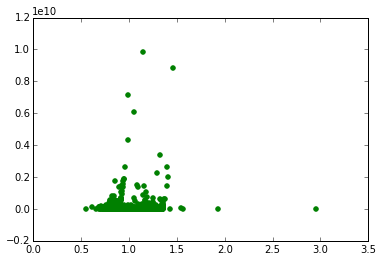

In [1269]:
plt.scatter(startup_scores.as_matrix(), startup_funding.as_matrix(), color='g')

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


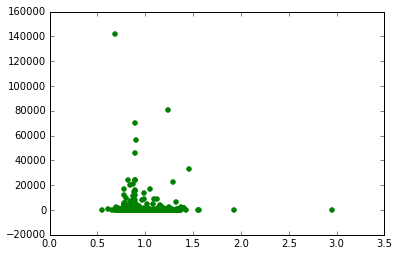

In [1270]:
plt.scatter(startup_scores, startup_employees, color='g')

In [1271]:
plotdata.describe()

,num_employees,crunchbase_rank,total_funding_amount,trend_score,total_equity_funding_amount,time_since_last_funding,funding_ratio,school_score,company_score,score
count,1652.000000,1652.000000,1.652000e+03,1640.000000,1.652000e+03,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000
mean,749.254843,5733.289346,1.292584e+08,0.006707,1.157391e+08,2.260805,115.739058,1.330926,0.402016,0.942002
std,5142.082639,5928.124290,5.713946e+08,2.479013,4.634955e+08,2.001014,463.495508,0.271340,0.011003,0.177542
min,2.000000,6.000000,2.500000e+06,-9.300000,2.500000e+06,0.060000,2.500000,0.750000,0.400000,0.547000
25%,31.000000,1572.500000,1.347500e+07,-1.100000,1.314875e+07,0.890000,13.148750,1.200000,0.400000,0.829000
50%,89.000000,3788.500000,3.774241e+07,-0.500000,3.700000e+07,1.720000,37.000000,1.200000,0.400000,0.888000
75%,250.250000,7699.250000,9.492913e+07,0.400000,9.095311e+07,2.880000,90.953000,1.440000,0.400000,0.997250
max,142267.000000,44746.000000,1.200247e+10,9.600000,9.853784e+09,20.640000,9853.784000,4.500000,0.525000,2.950000


In [1272]:
regressor.coef_

array([[  4.24937148e-11]])

In [1273]:
regressor.intercept_

array([ 0.93708424])

In [1274]:
rankedstartups[rankedstartups.past_companies.str.contains('Clarium')].head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,categories,founded_date,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score
4,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,"FinTech, Financial Services, Home Services, En...",05/01/2012,08/24/2017,160000000,NaN,0.33,160.0,1.92,0.4,1.352
1155,Artivest,39,"Artivest, Merrill Lynch, UBS, Clarium Capital ...","New York University, University of Virginia, Y...",https://www.crunchbase.com/organization/artivest,"Financial Services, Lending and Investments","New York, New York, United States",Artivest connects a wider audience of suitable...,6256,http://www.artivest.co,...,"FinTech, Wealth Management, Financial Services...",01/01/2011,05/04/2015,17000000,NaN,2.64,17.0,1.20,0.4,0.834


In [1275]:
top_companies = rankedstartups[:200]
top_companies_past = []
for company in top_companies['past_companies']:
    top_companies_past.extend([s.strip() for s in company.split(',')])
Counter(top_companies_past).most_common(20)

[('Google', 58),
 ('Microsoft', 48),
 ('Stanford University', 39),
 ('Oracle', 24),
 ('Apple', 22),
 ('University of California', 21),
 ('IBM', 18),
 ('Cisco', 18),
 ('Yahoo! Inc.', 16),
 ('Facebook', 15),
 ('Salesforce', 11),
 ('Berkeley', 10),
 ('LinkedIn', 9),
 ('VMware', 9),
 ('Hewlett Packard Enterprise', 9),
 ('Twitter', 8),
 ('Amazon', 8),
 ('Palantir Technologies', 6),
 ('Adobe', 5),
 ('Genentech', 5)]

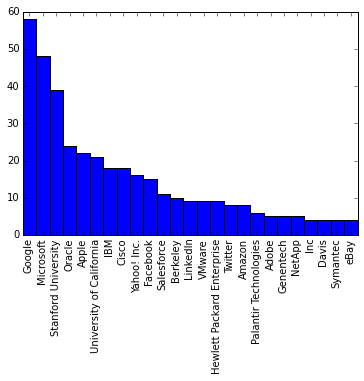

In [1276]:
chart_most_common(top_companies_past)

In [1277]:
top_companies_schools = []
for company in top_companies['past_schools']:
    top_companies_schools.extend([s.strip() for s in company.split(',')])
Counter(top_companies_schools).most_common(20)

[('Stanford University', 159),
 ('University of California Berkeley', 134),
 ('University of California Davis', 48),
 ('San Francisco State University', 37),
 ('San Jose State University', 33),
 ('Massachusetts Institute of Technology', 26),
 ('University of California Los Angeles', 23),
 ('Carnegie Mellon University', 21),
 ('University of California Santa Barbara', 16),
 ('University of Southern California', 16),
 ('Stanford University Graduate School of Business', 15),
 ('Santa Clara University', 14),
 ('Harvard University', 13),
 ('California Polytechnic State University-San Luis Obispo', 13),
 ('Cornell University', 12),
 ('University of California San Diego', 12),
 ('University of Michigan', 10),
 ('University of California Santa Cruz', 9),
 ('University of Washington', 9),
 ('University of Waterloo', 9)]

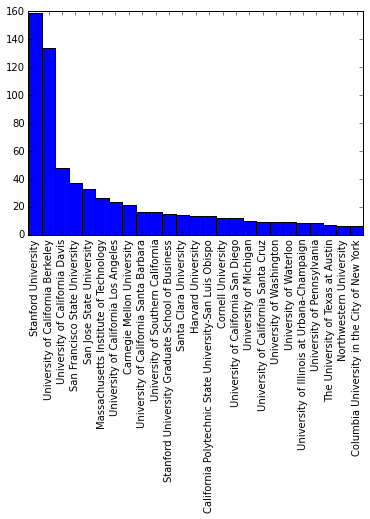

In [1278]:
chart_most_common(top_companies_schools)

In [1279]:
rankedstartups[240:242]

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,categories,founded_date,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score
732,"Xcalar, Inc.",36,"NetApp, Oracle, SanDisk®, IBM, Hewlett Packard...","Carnegie Mellon University, University of Cali...",https://www.crunchbase.com/organization/xcalar,"Data and Analytics, Software","San Jose, California, United States",Xcalar is a business analytics platform to dis...,3054,http://www.xcalar.com/,...,"Enterprise Software, Big Data, Analytics",12/20/2013,06/28/2017,21000000,NaN,0.48,21.0,1.62,0.4,1.161
691,Open Listings,22,"Huge, Redfin, Microsoft, Google, Citysearch.com","Columbia University in the City of New York, H...",https://www.crunchbase.com/organization/open-l...,"Commerce and Shopping, Real Estate","Los Angeles, California, United States",Open Listings is a real estate agency that mak...,2798,https://www.openlistings.com,...,"Property Management, E-Commerce, Real Estate",05/01/2014,07/13/2017,7500000,NaN,0.44,7.5,1.62,0.4,1.160


In [1280]:
rankedstartups[rankedstartups.categories.str.contains('GovTech', na=False)].head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,categories,founded_date,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score
1580,OpenGov,154,"OpenGov Inc., IBM, Stanford University, Meltwa...","Stanford University, University of California ...",https://www.crunchbase.com/organization/opengov,"Information Technology, Data and Analytics, So...","Redwood City, California, United States",OpenGov offers cloud-based software that visua...,18222,http://opengov.com,...,"SaaS, Data Visualization, Enterprise Software,...",01/01/2012,05/16/2017,77000000,NaN,0.60,77.00,1.92,0.4,1.349
1662,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...",https://www.crunchbase.com/organization/neighb...,"Information Technology, Software, Government a...","San Francisco, California, United States",Neighborly modernizes access to public finance...,31861,https://neighborly.com,...,"Finance, Software, Impact Investing, FinTech, ...",03/01/2012,05/17/2017,30500000,NaN,0.60,30.50,1.92,0.4,1.348
801,Mark43,110,"Dataminr, Mark43, Deloitte, S&P Global Market ...","Harvard University, The George Washington Univ...",https://www.crunchbase.com/organization/mark43,"Information Technology, Data and Analytics, So...","New York, New York, United States",Mark43 develops law enforcement software that ...,3417,http://mark43.com,...,"Software, GovTech, Law Enforcement, Analytics,...",02/01/2012,04/27/2016,39750000,NaN,1.65,39.75,1.68,0.4,1.174
153,Nextdoor,271,"Twitter, Nextdoor, Google, Yelp, eBay Advertising","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/nextdoor,"Media and Entertainment, Information Technolog...","San Francisco, California, United States",Nextdoor is a private social network that enab...,490,http://nextdoor.com,...,"Social Media, Private Social Networking, GovTe...",01/01/2010,03/03/2015,210200000,NaN,2.81,210.20,1.74,0.4,1.171
501,Remix,114,"Microsoft, Code for America, LinkedIn, Omada H...","Massachusetts Institute of Technology, Brown U...",https://www.crunchbase.com/organization/remix,"Information Technology, Government and Militar...","San Francisco, California, United States",Remix is a planning platform for public transit.,1928,https://www.remix.com/,...,"Public Transportation, Transportation, Informa...",10/31/2014,05/09/2017,12000000,NaN,0.62,12.00,1.20,0.4,0.897


In [1281]:
plotdata[plotdata.company_name.str.contains('Google', na=False)]

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,categories,founded_date,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score
121,Google,80409,"Google, Microsoft, IBM, Amazon, Apple","Stanford University, University of California ...",https://www.crunchbase.com/organization/google,"Media and Entertainment, Information Technolog...","Mountain View, California, United States",Google is a multinational corporation that is ...,375,http://www.google.com/,...,"Blogging Platforms, Search Engine, Information...",09/07/1998,06/01/2000,36100000,"$23,053,669,655",17.57,36.1,1.92,0.46,1.235


In [1282]:
import json

with open('funding_data.json') as data_file:    
    vc_data = json.load(data_file)

In [1283]:
funding_data = [(cb_url, vc_data[cb_url]) for cb_url in plotdata.company_name_url if cb_url in vc_data]

In [1429]:
class Investment:
    funding_round = investor = ""
    partners = []
    is_lead_investor = False
    def __init__(self, investor, funding_round, partner, is_lead):
        self.funding_round = funding_round
        self.investor = investor
        self.partners = partner
        self.is_lead_investor = is_lead

In [1432]:
max_num_investors = 0
def json_to_investors(funding):
    investors = []
    global max_num_investors
    max_num_investors = max(max_num_investors, len(funding))
    for funding_event in funding:
        is_lead_investment = funding_event['is_lead_investor'] == 'Yes'
        partners = funding_event['partners'] if funding_event['partners'] != ['—'] else []
        investment = Investment(funding_event['investor_name'], funding_event['funding_round'], partners, is_lead_investment)
        investors.append((investment.investor, investment.funding_round))
    return investors

In [1433]:
[funding for funding in json_to_investors(funding_data[0][1])]

[('Morgan Stanley', 'Debt Financing '),
 ('Khosla Ventures', 'Series D '),
 ('Spark Capital', 'Series D '),
 ('Lightspeed Venture Partners', 'Series D '),
 ('Andreessen Horowitz', 'Series D '),
 ('Jefferies', 'Series D '),
 ('Founders Fund', 'Series D '),
 ('Spark Capital', 'Series B '),
 ('Khosla Ventures', 'Series B '),
 ('Lightspeed Venture Partners', 'Series B '),
 ('Andreessen Horowitz', 'Series B '),
 ('Jefferies', 'Series B '),
 ('Khosla Ventures', 'Series A '),
 ('Lightspeed Venture Partners', 'Series A ')]

In [1434]:
#[json_to_investors(data[x]) for x in plotdata.company_name_url if x in data]
plotdata['funding'] = plotdata['company_name_url'].apply(lambda x: json_to_investors(vc_data[x]) if x in vc_data else None)

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [1435]:
plotdata = plotdata[pd.notnull(plotdata.funding)]
plotdata.shape

(1614, 26)

In [1436]:
def search_investors(x, name):
    return any([name in y for y in x])
founders_fund = plotdata[plotdata.funding.apply(lambda x: search_investors(x, 'Founders Fund'))]
founders_fund = founders_fund[founders_fund.time_since_last_funding < 1.5]
founders_fund.sort_values('score', ascending=False).head(10)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,funding,investor_score
1474,Palantir Technologies,1992,"Palantir Technologies, Google, Microsoft, Stan...","Stanford University, Cornell University, Massa...",https://www.crunchbase.com/organization/palant...,"Hardware, Information Technology, Consumer Ele...","Palo Alto, California, United States",Palantir Technologies offers a suite of softwa...,13212,http://www.palantir.com,...,01/20/2017,2018929671,NaN,0.92,2018.930,1.92,0.49,1.406,"[(Binux Capital, Private Equity Round ), (Shar...",11.644104
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,11/12/2017,620000000,NaN,0.11,620.000,1.92,0.46,1.371,"[(Morgan Stanley, Debt Financing ), (Khosla Ve...",7.320814
1670,Stripe,831,"Google, Twitter, Stripe, Facebook, Microsoft","Stanford University, University of California ...",https://www.crunchbase.com/organization/stripe,"Software, Payments, Financial Services, Lendin...","San Francisco, California, United States",Stripe provides a set of unified APIs and tool...,482,http://stripe.com,...,11/25/2016,440000000,NaN,1.07,440.000,1.92,0.46,1.359,"[(CapitalG, Series D ), (General Catalyst, Ser...",17.774854
4,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,08/24/2017,160000000,NaN,0.33,160.000,1.92,0.40,1.352,"[(Lightspeed Venture Partners, Series D ), (Ja...",11.748535
3,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca...",https://www.crunchbase.com/organization/qadium...,"Information Technology, Software, Privacy and ...","San Francisco, California, United States",Qadium creates and organizes knowledge about t...,4492,https://qadium.com/,...,8/30/2017,65970000,NaN,0.31,65.970,1.92,0.40,1.350,"[(IVP (Institutional Venture Partners), Series...",10.682338
150,Freenome,32,"Counsyl, Stanford University, Syracuse Univers...","Stanford University, Northwestern University, ...",https://www.crunchbase.com/organization/freenome,"Biotechnology, Science and Engineering, Health...","South San Francisco, California, United States",Freenome is a platform that helps design healt...,467,http://www.freenome.com,...,08/28/2017,77550000,NaN,0.32,77.550,1.92,0.40,1.350,"[(GV, Series A ), (Andreessen Horowitz, Series...",13.741637
318,Branch,198,"Branch, Google, Microsoft, Nokia, Hewlett Pack...","Stanford University, Stanford University Gradu...",https://www.crunchbase.com/organization/branch...,"Apps, Data and Analytics, Software, Sales and ...","Palo Alto, California, United States",Branch helps companies drive seamless mobile e...,1090,https://branch.io,...,04/10/2017,113050000,NaN,0.70,113.050,1.92,0.40,1.349,"[(Cowboy Ventures, Series C ), (Playground Ven...",16.149991
1271,Boom Fantasy,14,"IAF - Israeli Air Force, Carestream, High 5 Ga...",Stanford University Graduate School of Busines...,https://www.crunchbase.com/organization/boom-s...,"Gaming, Sports, Mobile","New York, New York, United States",Boom Shakalaka is an in-game fantasy sports co...,7876,https://www.boomfantasy.com/,...,05/31/2017,3400000,NaN,0.56,3.400,1.92,0.40,1.347,"[(Ken Hertz, Seed Round ), (Founders Fund, See...",5.128120
75,Airbnb,6213,"Airbnb, Google, Facebook, Microsoft, Apple","Univ

In [1437]:
thiel = plotdata[plotdata.funding.apply(lambda x: search_investors(x, 'Peter Thiel') or search_investors(x, 'Max Levchin'))]
thiel = thiel[thiel.num_employees > 10]
thiel = thiel[thiel.categories.str.contains('Financ', na=False)]
#thiel = thiel[thiel.last_funding_type.str.contains('Series A')]
thiel.sort_values('score', ascending=False).head(10)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,funding,investor_score
4,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,08/24/2017,160000000,NaN,0.33,160.000,1.92,0.4,1.352,"[(Lightspeed Venture Partners, Series D ), (Ja...",11.748535
147,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",https://www.crunchbase.com/organization/addepar,Financial Services,"Mountain View, California, United States",Addepar is an investment management platform f...,457,https://addepar.com,...,06/08/2017,205839694,NaN,0.54,205.840,1.92,0.4,1.352,"[(CreditEase Fintech Investment Fund, Series D...",15.139560
137,AngelList,137,"Microsoft, eBay, Voxbone, Google, Dropbox","Stanford University, University of California ...",https://www.crunchbase.com/organization/angellist,"Professional Services, Financial Services","San Francisco, California, United States","AngelList is a U.S. website for startups, ange...",434,http://angel.co,...,03/09/2015,26200000,NaN,2.79,26.200,1.92,0.4,1.279,"[(Haiyin Capital, Series B ), (Social Leverage...",20.148745
319,OnDeck,499,"OnDeck, Capital One, American Express, Citi, M...","Cornell University, Columbia University in the...",https://www.crunchbase.com/organization/on-deck,"Financial Services, Lending and Investments","New York, New York, United States",Ondeck is a technology-enabled financial platf...,1092,http://www.ondeck.com,...,12/09/2016,190000000,"$1,320,000,000",1.04,190.000,1.56,0.4,1.121,"[(Credit Suisse, Post), (IVP (Institutional Ve...",16.738758
323,Avant,430,"Avant, Enova International, HSBC, Superfund As...","University of Illinois at Urbana-Champaign, De...",https://www.crunchbase.com/organization/avant-...,"Financial Services, Lending and Investments","Chicago, Illinois, United States","Changing the way you borrow with safer, faster...",1112,http://www.avant.com,...,09/29/2015,654000000,NaN,2.23,654.000,1.50,0.4,1.054,"[(Balyasny Asset Management, Series E ), (Gene...",14.687459
623,Orchard Platform,64,"Orchard Platform, Admeld, Google, Morgan Stanl...","University of Michigan, New York University, C...",https://www.crunchbase.com/organization/orchard,Financial Services,"New York, New York, United States",Orchard Platform is a technology and infrastru...,2453,http://www.orchardplatform.com,...,09/10/2015,44700000,NaN,2.28,44.700,1.44,0.4,0.999,"[(CreditEase Fintech Investment Fund, Series C...",16.145597
1558,SoFi,952,"SoFi, American Express, Wells Fargo, Overstock...","Santa Rosa Junior College, University of Utah,...",https://www.crunchbase.com/organization/social...,"Education, Financial Services","San Francisco, California, United States",SoFi is a modern finance company taking an unp...,16311,http://www.sofi.com,...,02/24/2017,1878226991,NaN,0.82,1878.227,1.20,0.4,0.942,"[(RPM Ventures, Series F ), (RSC Capital, Seri...",23.655504
253,Xero,56830,"Xerox, Hewlett Packard Enterprise, Xerox Servi...","Rochester Institute of Technology, University ...",https://www.crunchbase.com/organization/xero,"Software, Professional Services, Payments, Fin...","Wellington, Wellington, New Zealand",Xero provides beautiful cloud accounting softw...,830,http://xero.com,...,04/18/2017,381395300,NaN,0.68,381.395,1.20,0.4,0.906,"[(TCV, Post), (Accel Partners, Post), (Matrix ...",7.178207
294,Kreditech Holding,257,"Kreditech Holding SSL GmbH, Accenture, Citi, X...","University of Hamburg, University of Warsaw, J...",https://www.crunchbase.com/organization/k

In [1438]:
eightvc = plotdata[plotdata.funding.apply(lambda x: search_investors(x, '8VC'))]
eightvc.sort_values('score', ascending=False).head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,funding,investor_score
147,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",https://www.crunchbase.com/organization/addepar,Financial Services,"Mountain View, California, United States",Addepar is an investment management platform f...,457,https://addepar.com,...,06/08/2017,205839694,NaN,0.54,205.84,1.92,0.40,1.352,"[(CreditEase Fintech Investment Fund, Series D...",15.139560
1580,OpenGov,154,"OpenGov Inc., IBM, Stanford University, Meltwa...","Stanford University, University of California ...",https://www.crunchbase.com/organization/opengov,"Information Technology, Data and Analytics, So...","Redwood City, California, United States",OpenGov offers cloud-based software that visua...,18222,http://opengov.com,...,05/16/2017,77000000,NaN,0.60,77.00,1.92,0.40,1.349,"[(Andreessen Horowitz, Series C ), (Thrive Cap...",16.183834
1662,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...",https://www.crunchbase.com/organization/neighb...,"Information Technology, Software, Government a...","San Francisco, California, United States",Neighborly modernizes access to public finance...,31861,https://neighborly.com,...,05/17/2017,30500000,NaN,0.60,30.50,1.92,0.40,1.348,"[(Abstract Ventures, Series A ), (Sound Ventur...",9.141989
902,Ascend.io,14,"Microsoft, IBM, Ooyala, Oracle, Extole","Stanford University, University of California ...",https://www.crunchbase.com/organization/ascend-io,"Data and Analytics, Software","Palo Alto, California, United States",Ascend is a platform for the rapid creation of...,4165,http://www.ascend.io,...,05/17/2017,19000000,NaN,0.60,19.00,1.92,0.40,1.347,"[(Accel Partners, Series A ), (Sequoia Capital...",4.816133
449,Honor,218,"Google, Meebo, Apple, Home Instead Senior Care...","Stanford University, Stanford University Gradu...",https://www.crunchbase.com/organization/honor-2,"Information Technology, Health Care, Mobile","San Francisco, California, United States",Honor provides personalized home care for peop...,1676,http://joinhonor.com,...,08/05/2016,62000000,NaN,1.38,62.00,1.92,0.46,1.341,"[(Syno Capital, Series B ), (8VC, Series B ), ...",7.187636


In [1439]:
a16z = plotdata[plotdata.funding.apply(lambda x: search_investors(x, 'Andreessen Horowitz'))]
a16z = a16z[a16z.num_employees > 10]
a16z.sort_values('score', ascending=False).head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,funding,investor_score
94,Pinterest,1639,"Google, Pinterest, Facebook, Microsoft, Yahoo!...","Stanford University, University of California ...",https://www.crunchbase.com/organization/pinterest,"Travel and Tourism, Media and Entertainment, I...","San Francisco, California, United States",Pinterest is a visual bookmarking tool for sav...,266,https://pinterest.com,...,06/06/2017,1466100000,NaN,0.55,1466.1,1.92,0.46,1.392,"[(blisce/, Secondary Market ), (Founders Circl...",33.693331
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,11/12/2017,620000000,NaN,0.11,620.0,1.92,0.46,1.371,"[(Morgan Stanley, Debt Financing ), (Khosla Ve...",7.320814
1670,Stripe,831,"Google, Twitter, Stripe, Facebook, Microsoft","Stanford University, University of California ...",https://www.crunchbase.com/organization/stripe,"Software, Payments, Financial Services, Lendin...","San Francisco, California, United States",Stripe provides a set of unified APIs and tool...,482,http://stripe.com,...,11/25/2016,440000000,NaN,1.07,440.0,1.92,0.46,1.359,"[(CapitalG, Series D ), (General Catalyst, Ser...",17.774854
1319,Robinhood,192,"Google, Facebook, Stanford University, Univers...","Stanford University, University of California ...",https://www.crunchbase.com/organization/analyst,"Financial Services, Mobile","Palo Alto, California, United States",Robinhood is a stock brokerage that allows cus...,8704,https://www.robinhood.com/,...,04/26/2017,176000000,NaN,0.66,176.0,1.92,0.45,1.357,"[(DST Global, Series C ), (Index Ventures, Ser...",18.661995
678,LimeBike,54,"Facebook, Microsoft, Zipcar, PepsiCo, Google","Stanford University, Sun Yat-Sen University, U...",https://www.crunchbase.com/organization/limebike,"Apps, Software, Transportation, Internet Servi...","San Mateo, California, United States","LimeBike is a dock-less bike share system, aim...",2757,https://www.limebike.com/,...,03/15/2017,12000000,NaN,0.77,12.0,1.92,0.45,1.352,"[(Section 32, Series B ), (Coatue Management, ...",9.171289


In [1440]:
top_investors = []
for company in plotdata.funding:
    top_investors.extend([s[0] for s in company])
Counter(top_investors).most_common(20)

[('Sequoia Capital', 581),
 ('Accel Partners', 533),
 ('Kleiner Perkins Caufield & Byers', 470),
 ('Andreessen Horowitz', 355),
 ('Khosla Ventures', 326),
 ('SV Angel', 315),
 ('Lightspeed Venture Partners', 292),
 ('General Catalyst', 250),
 ('Greylock Partners', 249),
 ('Benchmark', 236),
 ('Y Combinator', 193),
 ('New Enterprise Associates', 193),
 ('GV', 185),
 ('Founders Fund', 176),
 ('Index Ventures', 166),
 ('First Round Capital', 165),
 ('DAG Ventures', 121),
 ('Slow Ventures', 110),
 ('Redpoint', 105),
 ('Felicis Ventures', 103)]

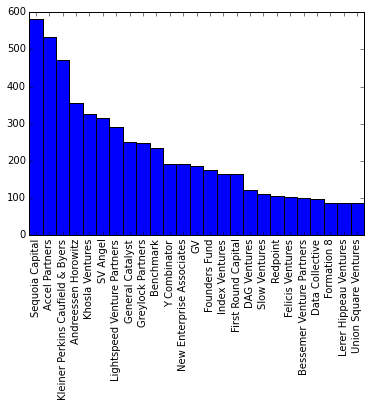

In [1441]:
chart_most_common(top_investors)

In [1442]:
top_investors = pd.read_csv('top_investors.csv')

In [1443]:
top_investors['Number of Investments'] = top_investors['Number of Investments'].replace('[\$,]', '', regex=True).astype(int)
top_investors['norm_investments'] = top_investors['Number of Investments'] / top_investors['Number of Investments'].max()
top_investors['norm_exits'] = top_investors['Number of Exits'] / top_investors['Number of Exits'].max()
top_investors['exit_ratio'] = top_investors['Number of Exits'] / top_investors['Number of Investments']

In [1444]:
top_investors['score'] = top_investors['norm_investments'] * 0.35 + top_investors['norm_exits'] * 0.45 + top_investors['exit_ratio'] * 0.2
top_investors.sort_values('score', ascending=False).head()

,Organization/Person Name,Organization/Person Name URL,Number of Investments,Number of Exits,Location,Description,CB Rank (Investor),Trend Score (90 Days),Investor Type,Investment Stage,norm_investments,norm_exits,exit_ratio,score
0,Intel Capital,/organization/intel-capital,1201,336,"Santa Clara, California, United States",Intel Capital is an investment firm that is fo...,63,9.0,Venture Capital,Seed,0.752978,1.000000,0.279767,0.769496
2,Sequoia Capital,/organization/sequoia-capital,1503,261,"Menlo Park, California, United States","Sequoia is a VC firm focused on energy, financ...",20,1.2,Venture Capital,"Seed, Early Stage Venture, Late Stage Venture",0.942320,0.776786,0.173653,0.714096
1,New Enterprise Associates,/organization/new-enterprise-associates,1371,273,"Menlo Park, California, United States",New Enterprise Associates is a California-base...,38,1.0,Venture Capital,"Post-Ipo, Seed, Late Stage Venture, Debt, Earl...",0.859561,0.812500,0.199125,0.706296
4,Accel Partners,/organization/accel-partners,1119,230,"Palo Alto, California, United States",Accel is a leading early and growth-stage vent...,33,1.2,Venture Capital,"Seed, Early Stage Venture, Late Stage Venture",0.701567,0.684524,0.205541,0.594692
8,Y Combinator,/organization/y-combinator,1488,170,"Mountain View, California, United States",Y Combinator is a startup accelerator based in...,7,-0.4,Accelerator,"Seed, Early Stage Venture, Debt",0.932915,0.505952,0.114247,0.577048


In [1445]:
print(max_num_investors)

99


In [1508]:
def score_round(funding_round):
    if 'Series A' in funding_round:
        return 0.8
    elif 'Series B' in funding_round:
        return 1.2
    elif 'Series C' in funding_round:
        return 1.4
    elif 'Series D' in funding_round:
        return 1.5
    elif 'Seed' in funding_round:
        return 0.4
    else:
        return 0.5
def score_investors(startup):
    investor_scorer = {'Founders Fund': 0.95, 'Peter Thiel': 0.9, '8VC': 0.85, 'Max Levchin': 0.85, 'SciFi VC': 0.8, 
                      'Andreessen Horowitz': 0.85, 'Sequoia Capital': 0.8, 'Greylock Partners': 0.8, 'Khosla Ventures': 0.75,
                      'Lightspeed Venture Partners': 0.7, 'Accel Partners': 0.6, 'General Catalyst': 0.7,
                      'Formation 8': 0.7, 'Naval Ravikant': 0.65, 'Joe Lonsdale': 0.8}
    investor_score = 0
    for funding_event in startup:
        if funding_event[0] in investor_scorer:
            investor_score += investor_scorer[funding_event[0]] * score_round(funding_event[1])
        elif funding_event[0] in top_investors['Organization/Person Name'].values:
            found_index = top_investors[top_investors['Organization/Person Name'] == funding_event[0]].index[0]
            investor_score += (len(top_investors) - found_index) / len(top_investors) * 0.6 * score_round(funding_event[1])
        else:
            investor_score += 0.2 * score_round(funding_event[1])
    return investor_score / len(startup) 

In [1509]:
plotdata['investor_score'] = plotdata['funding'].apply(lambda row: score_investors(row))

In [1510]:
plotdata.sort_values('investor_score', ascending=False).head(40)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,funding,investor_score
190,Medallia,1153,"Medallia, Oracle, Microsoft, Google, Apple","University of Buenos Aires, Stanford Universit...",https://www.crunchbase.com/organization/medallia,"Hardware, Media and Entertainment, Consumer El...","Palo Alto, California, United States",Medallia provides SaaS-based customer experien...,639,http://www.medallia.com,...,07/21/2015,255000000,NaN,2.42,255.000,1.20,0.40,0.848,"[(Sequoia Capital, Series D ), (Sequoia Capita...",0.980000
1675,Samsara,148,"Cisco Meraki, Cisco, Betts Recruiting, Salesfo...","Massachusetts Institute of Technology, Califor...",https://www.crunchbase.com/organization/samsara-2,"Hardware, Consumer Electronics, Software","San Francisco, California, United States",Samsara disrupts the traditional sensor model ...,2020,http://www.samsara.com,...,06/21/2017,80000000,NaN,0.50,80.000,1.20,0.40,0.899,"[(General Catalyst, Series C ), (Andreessen Ho...",0.967500
519,Datrium,143,"VMware, Nimble Storage, Dell EMC, Data Domain,...","San Jose State University, University of Calif...",https://www.crunchbase.com/organization/datrium,"Hardware, Software","Sunnyvale, California, United States",Datrium provides Open Convergence for private ...,1986,http://www.datrium.com/,...,12/05/2016,110000000,NaN,1.05,110.000,1.20,0.40,0.894,"[(New Enterprise Associates, Series C ), (Ligh...",0.909580
1679,Rubrik,598,"Dell EMC, NetApp, Dell, VMware, Cisco","Stanford University, University of California ...",https://www.crunchbase.com/organization/rubrik,"Hardware, Information Technology, Software, In...","Palo Alto, California, United States",Rubrik offers live data access for recovery an...,10765,http://rubrik.com/,...,04/28/2017,292000000,NaN,0.65,292.000,1.92,0.40,1.354,"[(Kevin Durant, Funding Round ), (Greylock Par...",0.871500
1303,Magnet Systems Inc.,22,"BEA Systems, Good Powered by BlackBerry, Sun M...","California State University Chico, University ...",https://www.crunchbase.com/organization/magnet...,"Commerce and Shopping, Sales and Marketing, Mo...","Palo Alto, California, United States",Magnet Systems develops mobile application ser...,8374,http://magnet.com,...,08/20/2012,59767166,NaN,5.34,59.767,1.20,0.40,0.789,"[(Andreessen Horowitz, Series B ), (Andreessen...",0.850000
27,Databricks,223,"Microsoft, Google, Databricks, IBM, Axway","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/databr...,"Data and Analytics, Software","San Francisco, California, United States",Databricks accelerates innovation by unifying ...,35,https://databricks.com,...,08/22/2017,247000000,NaN,0.33,247.000,1.74,0.40,1.242,"[(Green Bay Ventures, Series D ), (Battery Ven...",0.838990
1429,Tillster,177,"Tillster Inc., Intuit, Nokia, Qualcomm, CRITIC...","University of California San Diego, San Diego ...",https://www.crunchbase.com/organization/tillster,"Commerce and Shopping, Software, Payments, Fin...","San Diego, California, United States",Global leader in digitally based customer enga...,11717,http://tillster.com/,...,03/12/2010,33712322,NaN,7.79,33.712,1.20,0.40,0.781,"[(Sequoia Capital, Series D ), (Steamboat Vent...",0.838177
349,Imperva,906,"Imperva, Hewlett Packard Enterprise, Check Poi...","Tel Aviv University, Ben-Gurion University of ...",https://www.crunchbase.com/organization/imperva,"Information Technology, Software, Privacy and ...","Redwood Shores, California, United States","Imperva provides activity monitoring, real-tim...",1236,http://www.imperva.com,...,06/23/2016,49000000,"$397,830,510",1.50,49.000,1.20,0.40,0.880,"[(Elliott Management Corp., Private Equity Rou...",0.832595
636,Glow,86,"Glowpoint Inc., BT, Glowpoint, Inc. (formerly ...","University of Colorado Boulder, U

In [1507]:
plotdata.corr()

,num_employees,crunchbase_rank,total_funding_amount,trend_score,total_equity_funding_amount,time_since_last_funding,funding_ratio,school_score,company_score,score,investor_score
num_employees,1.000000,-0.069874,0.169846,-0.052398,0.161994,0.199296,0.161994,-0.016467,0.046836,-0.012543,-0.044936
crunchbase_rank,-0.069874,1.000000,-0.111149,-0.101045,-0.110779,0.329987,-0.110779,-0.055319,-0.031771,-0.133402,-0.056396
total_funding_amount,0.169846,-0.111149,1.000000,-0.049626,0.983829,-0.070733,0.983829,0.041996,0.038663,0.122499,0.008433
trend_score,-0.052398,-0.101045,-0.049626,1.000000,-0.046129,0.052571,-0.046129,-0.036562,-0.074998,-0.054502,0.026880
total_equity_funding_amount,0.161994,-0.110779,0.983829,-0.046129,1.000000,-0.068337,1.000000,0.034610,0.035341,0.115843,0.014288
time_since_last_funding,0.199296,0.329987,-0.070733,0.052571,-0.068337,1.000000,-0.068337,-0.043520,-0.042274,-0.242703,0.195347
funding_ratio,0.161994,-0.110779,0.983829,-0.046129,1.000000,-0.068337,1.000000,0.034610,0.035341,0.115843,0.014288
school_score,-0.016467,-0.055319,0.041996,-0.036562,0.034610,-0.043520,0.034610,1.000000,0.121721,0.971446,-0.024758
company_score,0.046836,-0.031771,0.038663,-0.074998,0.035341,-0.042274,0.035341,0.121721,1.000000,0.143090,-0.053252
score,-0.012543,-0.133402,0.122499,-0.054502,0.115843,-0.242703,0.115843,0.971446,0.143090,1.000000,-0.070832
